<a href="https://colab.research.google.com/github/joachimwan/CubeSolver/blob/main/Cube_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A new Cube is initialized!



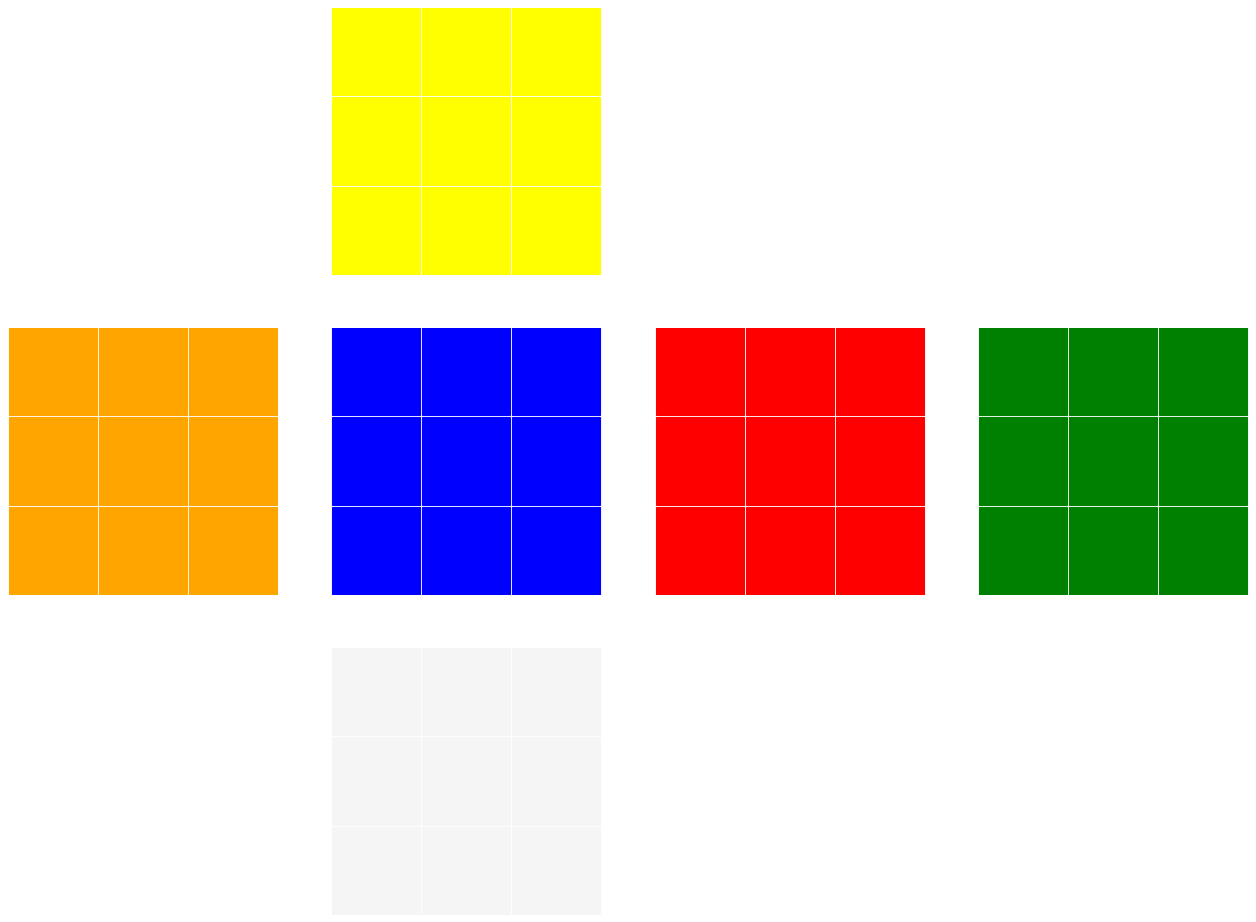

In [8]:
import numpy as np
import matplotlib.pyplot as plt


class Pieces:
  def __init__(self, x, y, z):
    self.color = {"F":0, "B":0, "L":0, "R":0, "U":0, "D":0}
    self.position = np.array([x, y, z])
  
  def rotate_x(self):
    # rotate position along right-left axis
    rotate_x = np.array([[ 1, 0, 0],
                         [ 0, 0, 1],
                         [ 0,-1, 0]])
    old_position = self.position.reshape(3,1)
    new_position = np.matmul(rotate_x, old_position)
    self.position = new_position.transpose()[0]
    
    # rotate color
    self.color = {"F":self.color["D"], "B":self.color["U"], "L":self.color["L"], "R":self.color["R"], "U":self.color["F"], "D":self.color["B"]}
  
  def rotate_y(self):
    # rotate position along up-down axis
    rotate_y = np.array([[ 0, 0,-1],
                         [ 0, 1, 0],
                         [ 1, 0, 0]])
    old_position = self.position.reshape(3,1)
    new_position = np.matmul(rotate_y, old_position)
    self.position = new_position.transpose()[0]
    
    # rotate color
    self.color = {"F":self.color["R"], "B":self.color["L"], "L":self.color["F"], "R":self.color["B"], "U":self.color["U"], "D":self.color["D"]}

  def rotate_z(self):
    # rotate position along front-back axis
    rotate_z = np.array([[ 0, 1, 0],
                         [-1, 0, 0],
                         [ 0, 0, 1]])
    old_position = self.position.reshape(3,1)
    new_position = np.matmul(rotate_z, old_position)
    self.position = new_position.transpose()[0]
    
    # rotate color
    self.color = {"F":self.color["F"], "B":self.color["B"], "L":self.color["D"], "R":self.color["U"], "U":self.color["L"], "D":self.color["R"]}


class Cube:
  def __init__(self):
    # initialize pieces
    self.pieces = []    
    for x in range(3):
      for y in range(3):
        for z in range(3):
          self.pieces.append(Pieces(x-1,y-1,z-1))
    # initialize colors
    for piece in self.pieces:
      if piece.position[0] == 1:
        piece.color["R"] = 4
      if piece.position[0] == -1:
        piece.color["L"] = 3
      if piece.position[1] == 1:
        piece.color["U"] = 5
      if piece.position[1] == -1:
        piece.color["D"] = 6
      if piece.position[2] == 1:
        piece.color["F"] = 1
      if piece.position[2] == -1:
        piece.color["B"] = 2
      
    print("A new Cube is initialized!\n")
  
  # current state
  def state(self):
    s = []
    for x in range(3):
      for y in range(3):
        for z in range(3):
          for piece in self.pieces:
            if np.array_equal(piece.position, np.array([x-1, y-1, z-1])):
              for side in ["F", "B", "L", "R", "U", "D"]:
                if piece.color[side] is not 0:
                  s.append(piece.color[side])          
    return np.array(s).reshape(-1,1)
  
  # find which pieces to rotate
  def rotate_right(self):
    for piece in self.pieces:
      if piece.position[0] == 1:
        piece.rotate_x()
  
  def rotate_right_p(self):
    for piece in self.pieces:
      if piece.position[0] == 1:
        piece.rotate_x()
        piece.rotate_x()
        piece.rotate_x()
  
  def rotate_left(self):
    for piece in self.pieces:
      if piece.position[0] == -1:
        piece.rotate_x()
        piece.rotate_x()
        piece.rotate_x()

  def rotate_left_p(self):
    for piece in self.pieces:
      if piece.position[0] == -1:
        piece.rotate_x()
  
  def rotate_up(self):
    for piece in self.pieces:
      if piece.position[1] == 1:
        piece.rotate_y()
  
  def rotate_up_p(self):
    for piece in self.pieces:
      if piece.position[1] == 1:
        piece.rotate_y()
        piece.rotate_y()
        piece.rotate_y()
  
  def rotate_down(self):
    for piece in self.pieces:
      if piece.position[1] == -1:
        piece.rotate_y()
        piece.rotate_y()
        piece.rotate_y()

  def rotate_down_p(self):
    for piece in self.pieces:
      if piece.position[1] == -1:
        piece.rotate_y()
  
  def rotate_front(self):
    for piece in self.pieces:
      if piece.position[2] == 1:
        piece.rotate_z()
  
  def rotate_front_p(self):
    for piece in self.pieces:
      if piece.position[2] == 1:
        piece.rotate_z()
        piece.rotate_z()
        piece.rotate_z()
  
  def rotate_back(self):
    for piece in self.pieces:
      if piece.position[2] == -1:
        piece.rotate_z()
        piece.rotate_z()
        piece.rotate_z()

  def rotate_back_p(self):
    for piece in self.pieces:
      if piece.position[2] == -1:
        piece.rotate_z()
  
  # check for solved state
  def solved(self):
    F, B, L, R, U, D = set(), set(), set(), set(), set(), set()
    for piece in self.pieces:
      F.add(piece.color["F"])
      B.add(piece.color["B"])
      L.add(piece.color["L"])
      R.add(piece.color["R"])
      U.add(piece.color["U"])
      D.add(piece.color["D"])
    if len(F) == 2 and len(B) == 2 and len(L) == 2 and len(R) == 2 and len(U) == 2 and len(D) == 2:
      return True
    else:
      return False
  
  def draw(self):
    color = ["black", "blue", "green", "orange", "red", "yellow", "whitesmoke"]
    
    plt.figure(figsize=[20,15], dpi=80, facecolor='white')

    c, pos = {}, {}
    
    # create empty dicts
    for side in ["F", "B", "L", "R", "U", "D"]:
      c[side] = []
      pos[side] = []
    
    # retrieve face color
    for piece in cube.pieces:
      if piece.position[1]==1:
        c["U"].append(piece.color["U"])
        pos["U"].append(piece.position[0:3:2])
      if piece.position[0]==-1:
        c["L"].append(piece.color["L"])
        pos["L"].append(piece.position[1:])
      if piece.position[2]==1:
        c["F"].append(piece.color["F"])
        pos["F"].append(piece.position[:2])
      if piece.position[0]==1:
        c["R"].append(piece.color["R"])
        pos["R"].append(piece.position[1:])
      if piece.position[2]==-1:
        c["B"].append(piece.color["B"])
        pos["B"].append(piece.position[:2])
      if piece.position[1]==-1:
        c["D"].append(piece.color["D"])
        pos["D"].append(piece.position[0:3:2])

    # Up
    plt.subplot(3,4,2)
    for i, p in enumerate(pos["U"]):
      plt.plot(p[0], p[1], color=color[c["U"][i]], marker='s', linestyle='None', markersize=80)
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.xticks([-1.5,1.5])
    plt.yticks([-1.5,1.5])
    plt.axis('off')

    # Left
    plt.subplot(3,4,5)
    for i, p in enumerate(pos["L"]):
      plt.plot(p[1], p[0], color=color[c["L"][i]], marker='s', linestyle='None', markersize=80)
    plt.axis('equal')
    plt.xticks([-1.5,1.5])
    plt.yticks([-1.5,1.5])
    plt.axis('off')

    # Front
    plt.subplot(3,4,6)
    for i, p in enumerate(pos["F"]):
      plt.plot(p[0], p[1], color=color[c["F"][i]], marker='s', linestyle='None', markersize=80)
    plt.axis('equal')
    plt.xticks([-1.5,1.5])
    plt.yticks([-1.5,1.5])
    plt.axis('off')

    # Right
    plt.subplot(3,4,7)
    for i, p in enumerate(pos["R"]):
      plt.plot(p[1], p[0], color=color[c["R"][i]], marker='s', linestyle='None', markersize=80)
    plt.gca().invert_xaxis()
    plt.axis('equal')
    plt.xticks([-1.5,1.5])
    plt.yticks([-1.5,1.5])
    plt.axis('off')

    # Back
    plt.subplot(3,4,8)
    for i, p in enumerate(pos["B"]):
      plt.plot(p[0], p[1], color=color[c["B"][i]], marker='s', linestyle='None', markersize=80)
    plt.gca().invert_xaxis()
    plt.axis('equal')
    plt.xticks([-1.5,1.5])
    plt.yticks([-1.5,1.5])
    plt.axis('off')

    # Down
    plt.subplot(3,4,10)
    for i, p in enumerate(pos["D"]):
      plt.plot(p[0], p[1], color=color[c["D"][i]], marker='s', linestyle='None', markersize=80)
    plt.axis('equal')
    plt.xticks([-1.5,1.5])
    plt.yticks([-1.5,1.5])
    plt.axis('off')


cube = Cube()
cube.draw()

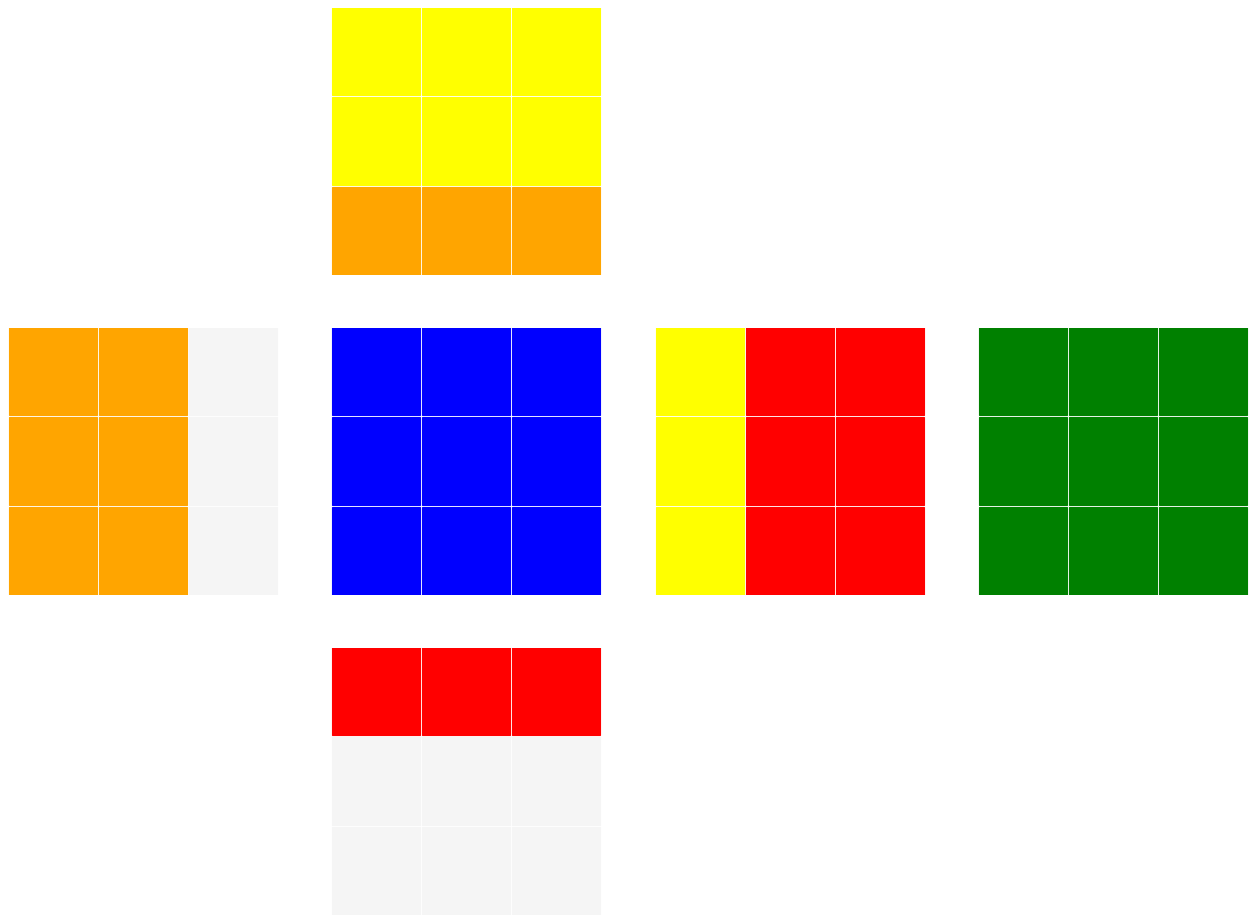

In [10]:
cube.rotate_front()
cube.draw()

In [11]:
print(cube.state())

[[2]
 [3]
 [6]
 [3]
 [6]
 [1]
 [6]
 [4]
 [2]
 [3]
 [3]
 [1]
 [6]
 [2]
 [3]
 [5]
 [3]
 [5]
 [1]
 [6]
 [3]
 [2]
 [6]
 [6]
 [1]
 [4]
 [2]
 [1]
 [2]
 [5]
 [5]
 [1]
 [3]
 [2]
 [4]
 [6]
 [4]
 [6]
 [1]
 [5]
 [4]
 [2]
 [4]
 [4]
 [1]
 [5]
 [2]
 [4]
 [5]
 [4]
 [5]
 [1]
 [5]
 [3]]
